In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkb
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from pyproj import Transformer
import folium
import leafmap.foliumap as leafmap

In [3]:
# Read the Feather file
df18 = pd.read_feather("/home/geethen/invasives/hypinvalimap/data/2018_extracted_data.feather")

# Convert geometry back from WKB
df18['geometry'] = df18['geometry'].apply(wkb.loads)

# Restore as a GeoDataFrame with correct CRS if needed
df18 = gpd.GeoDataFrame(df18, geometry='geometry', crs="EPSG:32734").to_crs("EPSG:4326")
df18

wl,geometry,0.40661,0.41337,0.42013,0.42689,0.43367,0.44044,0.44723,0.45402,0.46082,...,1.77188,1.77812,1.78435,1.95847,1.96467,1.97087,1.97707,1.98326,1.98946,1.99566
0,POINT (19.01091 -33.9917),1.0,1.0,21.0,32.0,53.0,72.0,86.0,87.0,81.0,...,883.0,847.0,806.0,103.0,108.0,112.0,117.0,121.0,126.0,130.0
1,POINT (19.00879 -33.9911),1.0,1.0,1.0,1.0,3.0,4.0,7.0,7.0,4.0,...,232.0,219.0,211.0,43.0,39.0,36.0,33.0,30.0,27.0,25.0
2,POINT (19.00823 -33.99113),1.0,1.0,13.0,36.0,62.0,75.0,78.0,75.0,69.0,...,708.0,672.0,641.0,76.0,81.0,84.0,88.0,93.0,98.0,103.0
3,POINT (19.0014 -33.99701),0.0,0.0,0.0,3.0,6.0,4.0,3.0,2.0,3.0,...,0.0,0.0,0.0,2.0,3.0,4.0,4.0,5.0,5.0,6.0
4,POINT (19.00051 -33.99803),1.0,1.0,1.0,1.0,8.0,14.0,16.0,15.0,8.0,...,1.0,1.0,1.0,4.0,5.0,5.0,6.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,POINT (19.49762 -33.99499),147.0,251.0,263.0,320.0,346.0,372.0,379.0,374.0,369.0,...,1923.0,1896.0,1884.0,1293.0,1288.0,1284.0,1281.0,1278.0,1272.0,1267.0
1682,POINT (19.49639 -33.99409),206.0,292.0,337.0,409.0,464.0,510.0,543.0,565.0,569.0,...,2674.0,2670.0,2662.0,2062.0,2053.0,2046.0,2039.0,2031.0,2021.0,2013.0
1683,POINT (19.4938 -33.99384),1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,...,440.0,430.0,423.0,167.0,157.0,148.0,138.0,130.0,119.0,110.0
1684,POINT (19.4932 -33.99476),1.0,1.0,1.0,4.0,8.0,9.0,14.0,15.0,16.0,...,761.0,748.0,738.0,379.0,367.0,353.0,341.0,328.0,313.0,300.0


In [4]:
# Load invasive species point data
# gdf = gpd.read_file('/home/geethen/invasives/hypinvalimap/data/aliens_sep2018.shp')
gdf = gpd.read_file('/home/geethen/invasives/hypinvalimap/data/aliens_sep2018_bioscape2023.shp')
gdf.crs# already in 4326
gdf.explore()
# gdf = gdf.to_crs("EPSG:32734")
gdf.head()
gdf

gdf18 = gpd.sjoin(df18, gdf[['geometry', 'class', 'group', 'change']], how='left', predicate='intersects')
gdf18

,geometry,0.40661,0.41337,0.42013,0.42689,0.43367,0.44044,0.44723,0.45402,0.46082,...,1.96467,1.97087,1.97707,1.98326,1.98946,1.99566,index_right,class,group,change
0,POINT (19.01091 -33.9917),1.0,1.0,21.0,32.0,53.0,72.0,86.0,87.0,81.0,...,108.0,112.0,117.0,121.0,126.0,130.0,401.0,6.0,2.0,0.0
1,POINT (19.00879 -33.9911),1.0,1.0,1.0,1.0,3.0,4.0,7.0,7.0,4.0,...,39.0,36.0,33.0,30.0,27.0,25.0,402.0,6.0,2.0,0.0
2,POINT (19.00823 -33.99113),1.0,1.0,13.0,36.0,62.0,75.0,78.0,75.0,69.0,...,81.0,84.0,88.0,93.0,98.0,103.0,400.0,6.0,2.0,0.0
3,POINT (19.0014 -33.99701),0.0,0.0,0.0,3.0,6.0,4.0,3.0,2.0,3.0,...,3.0,4.0,4.0,5.0,5.0,6.0,1356.0,6.0,1.0,0.0
4,POINT (19.00051 -33.99803),1.0,1.0,1.0,1.0,8.0,14.0,16.0,15.0,8.0,...,5.0,5.0,6.0,7.0,6.0,7.0,1355.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,POINT (19.49762 -33.99499),147.0,251.0,263.0,320.0,346.0,372.0,379.0,374.0,369.0,...,1288.0,1284.0,1281.0,1278.0,1272.0,1267.0,NaN,NaN,NaN,NaN
1682,POINT (19.49639 -33.99409),206.0,292.0,337.0,409.0,464.0,510.0,543.0,565.0,569.0,...,2053.0,2046.0,2039.0,2031.0,2021.0,2013.0,230.0,7.0,2.0,0.0
1683,POINT (19.4938 -33.99384),1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,...,157.0,148.0,138.0,130.0,119.0,110.0,224.0,3.0,2.0,0.0
1684,POINT (19.4932 -33.99476),1.0,1.0,1.0,4.0,8.0,9.0,14.0,15.0,16.0,...,367.0,353.0,341.0,328.0,313.0,300.0,225.0,3.0,2.0,0.0


In [5]:
df23 = gpd.read_file("/home/geethen/invasives/hypinvalimap/data/2023_extracted.geojson")
df23


,fid,class,group,change,notes,index_right,377.19565,382.20566,387.21564,392.22565,...,2465.8157,2470.8157,2475.8257,2480.8357,2485.8457,2490.8557,2495.8657,2500.8757,dist,geometry
0,1.0,0,2,1,seasonal w,1617,-0.009968,-0.008733,0.002173,0.005276,...,0.004468,-0.000922,-0.002775,-0.024097,-0.044038,0.068780,0.005774,0.010309,6.394885e-14,POINT (19.16467 -33.99555)
1,2.0,0,2,1,seasonal w,1612,-0.019244,-0.006666,0.004218,0.006731,...,-0.000617,0.001371,0.001319,-0.019521,-0.017924,0.002764,-0.034498,-0.015706,0.000000e+00,POINT (19.14254 -33.99885)
2,3.0,0,2,1,seasonal w,1248,-0.012649,0.010791,0.009590,0.004053,...,-0.000389,0.005122,-0.004704,-0.011844,-0.009114,0.050041,-0.011703,0.033020,4.263256e-14,POINT (19.15589 -33.98977)
3,4.0,0,2,1,seasonal w,1611,-0.027425,-0.001593,0.003823,0.001784,...,-0.000566,-0.002532,0.004520,-0.019516,0.008591,0.005424,0.013045,0.033618,1.421085e-14,POINT (19.13976 -33.99951)
4,5.0,0,2,1,seasonal w,1614,0.000811,0.006930,0.012532,0.013503,...,0.007117,-0.004049,-0.011886,-0.005820,-0.022991,0.033635,0.005198,-0.012026,7.105427e-15,POINT (19.15018 -33.99258)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1703.0,10,2,0,None,594,0.043676,0.040303,0.046708,0.058847,...,0.053556,0.055151,0.054108,0.070669,0.067385,0.124843,0.068315,0.080366,7.105427e-15,POINT (19.42509 -33.75278)
1684,1704.0,10,2,0,None,597,-0.006192,0.004535,0.006905,0.017799,...,0.015742,0.016449,0.019183,0.012901,0.007154,-0.027815,-0.024409,-0.001350,4.278034e-14,POINT (19.42491 -33.73767)
1685,1705.0,10,1,0,None,604,-0.007330,0.002634,0.013902,0.014275,...,0.011941,0.015408,0.008054,0.038101,0.000735,-0.081278,0.086065,0.036685,0.000000e+00,POINT (19.42439 -33.78279)
1686,1706.0,10,0,0,None,595,0.062697,0.042929,0.059132,0.054877,...,0.062541,0.066788,0.054639,0.048645,0.102097,0.166185,0.032145,0.069856,2.842171e-14,POINT (19.4255 -33.74736)


In [6]:
# add encoded labels
classDict = {"0": "Bare_Ground", "1": "Black_Wattle", "2": "Dense_Pines", "3": "Fynbos_High_Density", "4": "Fynbos_Low_Density", "5": "Gum", "6": "Indigenous_Forest", "7": "Rock", "8": "Wetland","9": "Snow", "10": "Water"}
df23['class_label'] = df23['class'].astype(str).map(classDict)

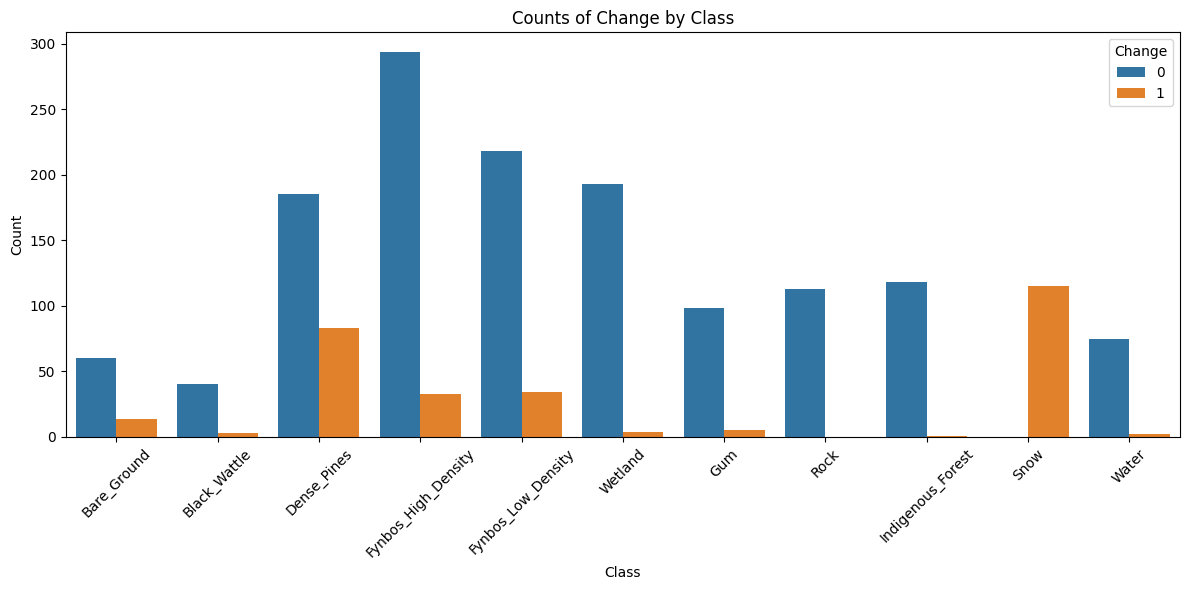

In [7]:
# Map class codes to descriptive names
classDict = {"0": "Bare_Ground", "1": "Black_Wattle", "2": "Dense_Pines", "3": "Fynbos_High_Density", "4": "Fynbos_Low_Density", "5": "Gum", "6": "Indigenous_Forest", "7": "Rock", "8": "Wetland","9": "Snow", "10": "Water"}

df23['class_label'] = df23['class'].astype(str).map(classDict)

# Now plot with the mapped labels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df23, x='class_label', hue='change')
plt.title('Counts of Change by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Change')
plt.tight_layout()
plt.show()


In [8]:
# fix notes column

note_mapping = {
    # Tree Cover - Increase
    'more tc': 'Tree Cover - Increase',
    'inc tc': 'Tree Cover - Increase',
    'more tc': 'Tree Cover - Increase',
    'more tc': 'Tree Cover - Increase',
    'denser tc': 'Tree Cover - Increase',
    'tree growt': 'Tree Cover - Increase',
    'tr add': 'Tree Cover - Increase',

    # Tree Cover - Decrease
    'less tc': 'Tree Cover - Decrease',
    'loss tc': 'Tree Cover - Decrease',
    'lwr tc': 'Tree Cover - Decrease',
    'rm tc': 'Tree Cover - Decrease',
    'red tc': 'Tree Cover - Decrease',
    'tc rm': 'Tree Cover - Decrease',

    # Tree Removal
    'tree rm': 'Tree Removal',
    'tr rm': 'Tree Removal',
    'tree rm su': 'Tree Removal',
    'cut trees': 'Tree Removal',
    'tr rm': 'Tree Removal',
    'tr rm': 'Tree Removal',

    # Vegetation - Increase
    'more veg': 'Vegetation - Increase',
    'veg growth': 'Vegetation - Increase',
    'veg recove': 'Vegetation - Increase',
    'more shrub': 'Vegetation - Increase',

    # Vegetation - Decrease
    'less veg': 'Vegetation - Decrease',
    'dry veg': 'Vegetation - Decrease',
    'veg rm': 'Vegetation - Decrease',
    'less dense': 'Vegetation - Decrease',
    'less shrub': 'Vegetation - Decrease',

    # Bare Ground
    'more bg': 'Bare Ground Change',
    'bg cnv wht': 'Bare Ground Change',

    # River
    'broad rv': 'River Change',
    'broader rv': 'River Change',

    # Other
    'aquati veg': 'Aquatic Vegetation',
    'seasonal w': 'Seasonal Water',
    'more wc': 'Water Cover - Increase',
    'erosion ne': 'Erosion / Soil Change',
    'spp. chng': 'Species Change',
    'inc rocks': 'Rock Increase',
    'grass': 'Grass Presence',
    'chng near': 'Change Near Riverbank',
    'chngg rb': 'Change Near Riverbank',
}

df23['note_category'] = (
    df23['notes']
    .astype(str)
    .str.lower()
    .str.strip()
    .map(note_mapping)
    .fillna('Unknown / Needs Review')
)


df23['note_category'].unique()

array(['Seasonal Water', 'Unknown / Needs Review',
       'Tree Cover - Decrease', 'Vegetation - Decrease',
       'Tree Cover - Increase', 'Tree Removal', 'Bare Ground Change',
       'Aquatic Vegetation', 'Erosion / Soil Change',
       'Water Cover - Increase', 'Grass Presence',
       'Vegetation - Increase', 'Change Near Riverbank', 'Species Change',
       'Rock Increase'], dtype=object)

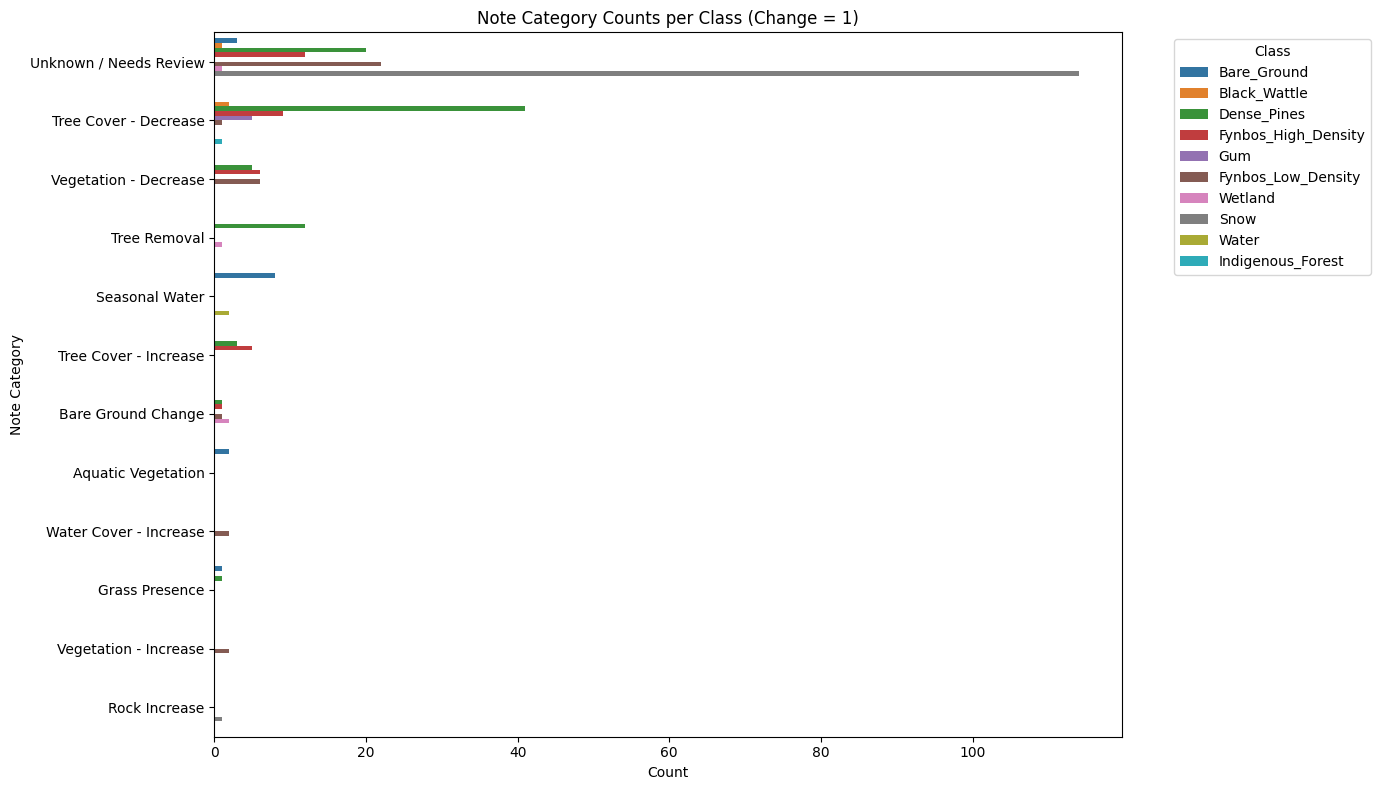

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for change == 1
df_change = df23[df23['change'] == 1].copy()

# Map class codes to readable labels
df_change['class_label'] = df_change['class'].astype(str).map(classDict)

plt.figure(figsize=(14, 8))
sns.countplot(
    data=df_change,
    y='note_category',
    hue='class_label',
    order=df_change['note_category'].value_counts().index  # sort by overall frequency
)

plt.title('Note Category Counts per Class (Change = 1)')
plt.xlabel('Count')
plt.ylabel('Note Category')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



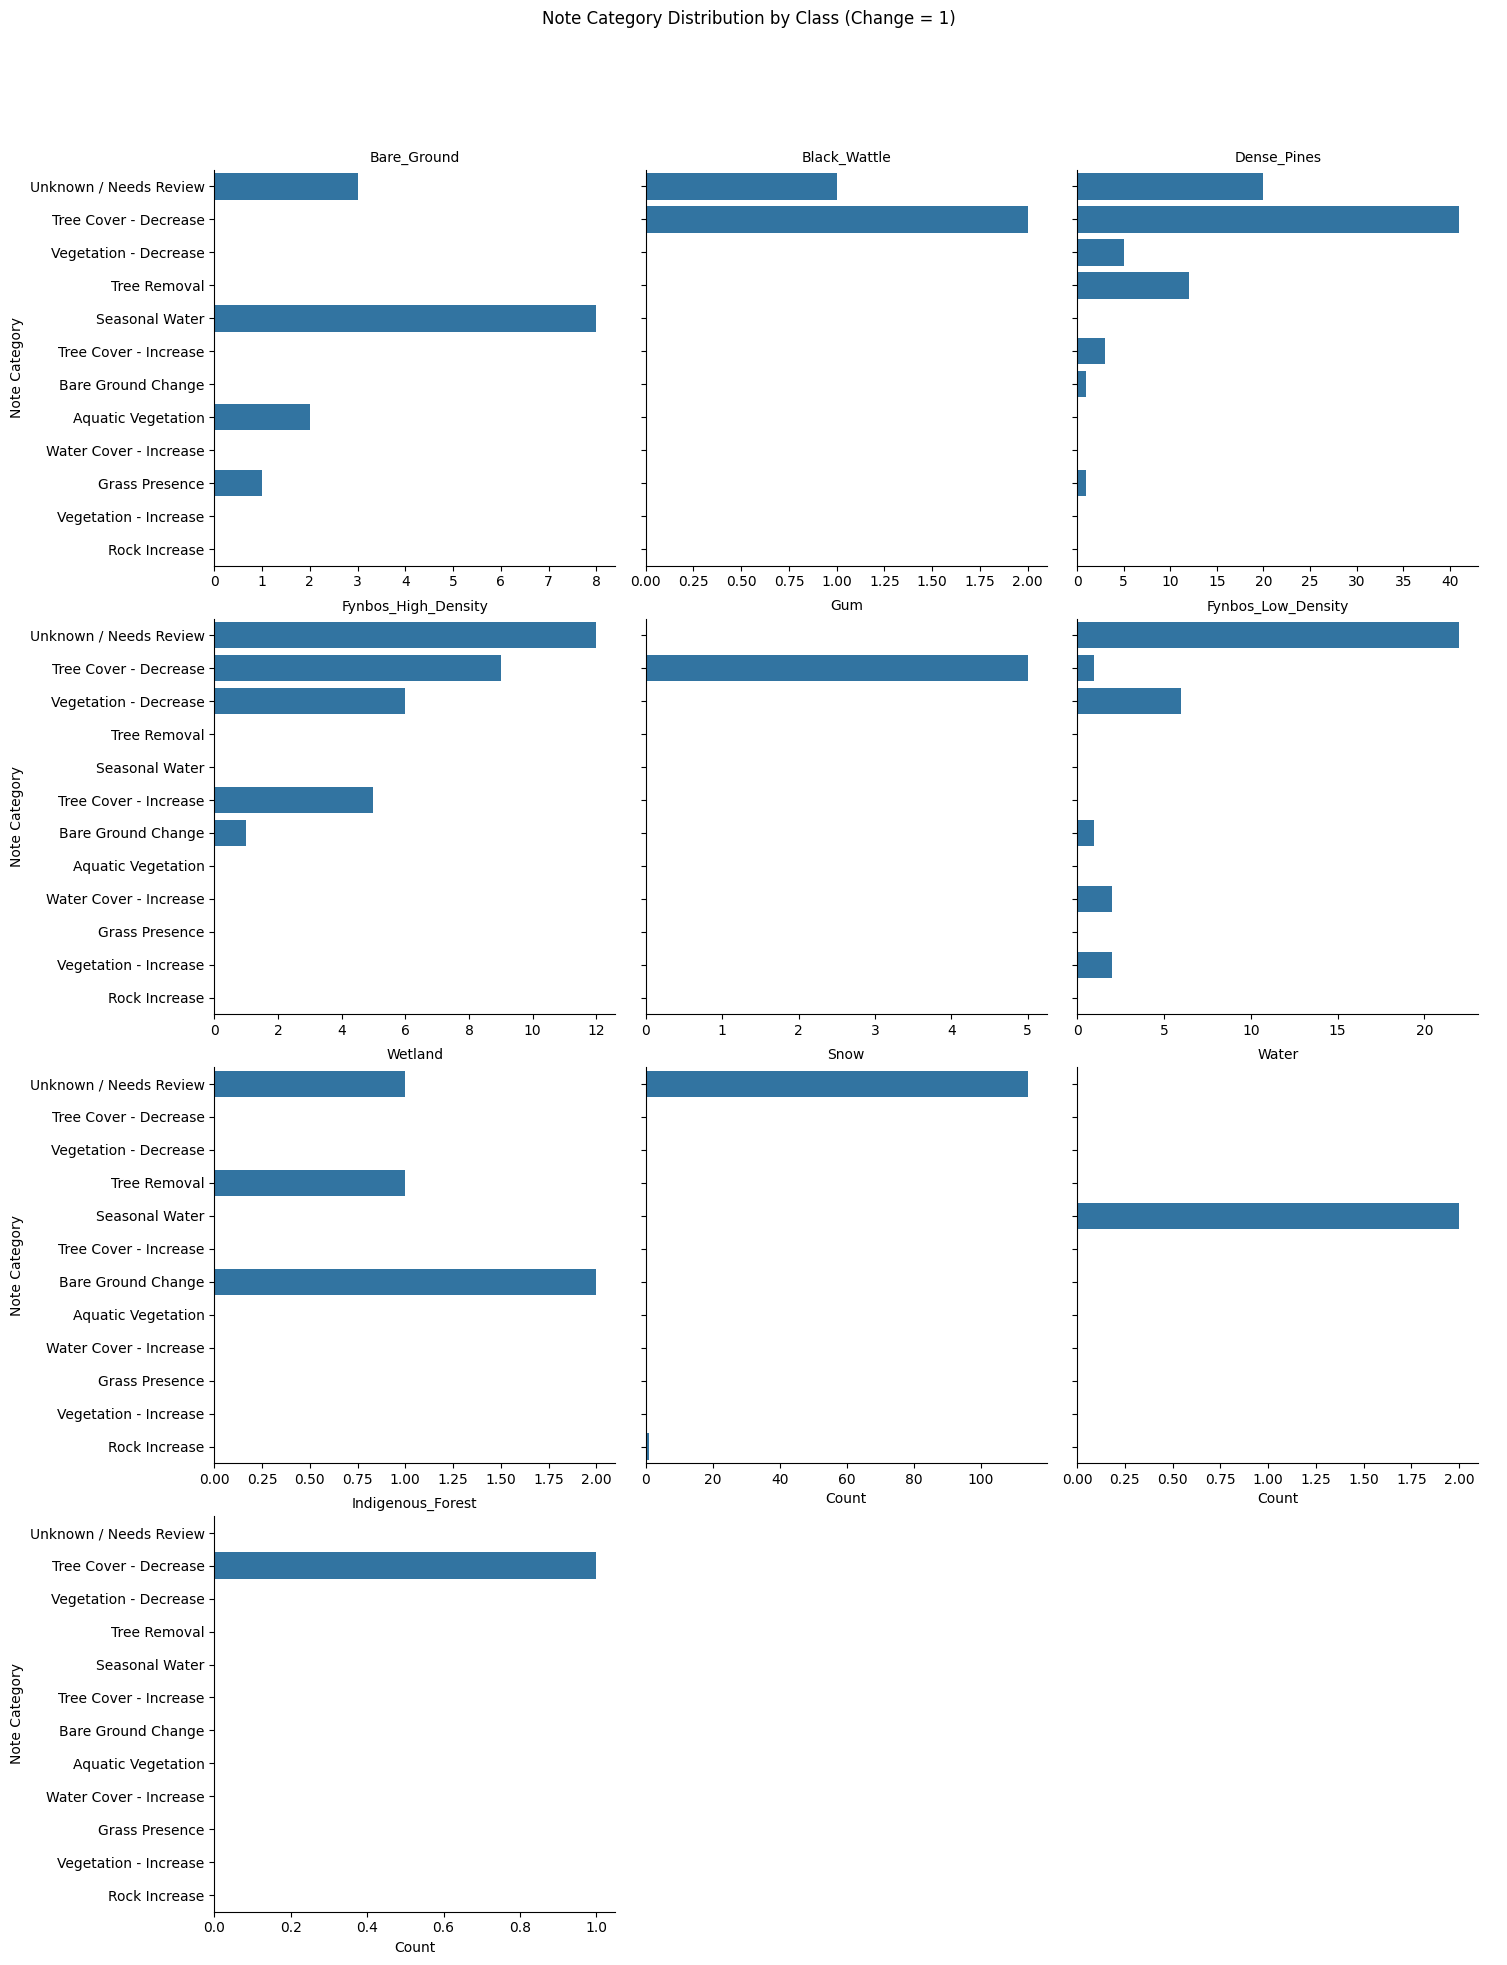

In [10]:
g = sns.catplot(
    data=df_change,
    y='note_category',
    kind='count',
    col='class_label',
    col_wrap=3,
    sharex=False,
    order=df_change['note_category'].value_counts().index
)
g.set_titles("{col_name}")
g.set_axis_labels("Count", "Note Category")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Note Category Distribution by Class (Change = 1)")
plt.show()


# Remove problem bands

In [11]:
import pandas as pd
import numpy as np

# Separate wavelength columns from metadata columns
wavelength_cols = [col for col in df23.columns if col.replace('.', '', 1).isdigit()]
non_wavelength_cols = [col for col in df23.columns if col not in wavelength_cols]

# Convert wavelength column names to float for comparison
wavelengths = np.array(wavelength_cols, dtype=float)

# Apply the mask from your original logic
mask = (
    (wavelengths < 450) |
    ((wavelengths >= 1340) & (wavelengths <= 1480)) |
    ((wavelengths >= 1800) & (wavelengths <= 1980)) |
    (wavelengths > 2000)
)

# Determine which columns to drop based on the mask
wavelengths_to_drop = np.array(wavelength_cols)[mask]

# Drop the unwanted wavelength columns
df23_filtered = df23.drop(columns=wavelengths_to_drop)
df23filtered = df23_filtered.dropna(subset=['class'])


In [12]:
df23filtered.columns

Index(['fid', 'class', 'group', 'change', 'notes', 'index_right', '452.32565',
       '457.33566', '462.34564', '467.35565',
       ...
       '1789.6356', '1794.6456', '1799.6556', '1984.9757', '1989.9856',
       '1994.9956', 'dist', 'geometry', 'class_label', 'note_category'],
      dtype='object', length=255)

# Band resampling

In [13]:
# Separate wavelength columns from metadata columns
wavelength23_cols = [col for col in df23_filtered.columns if col.replace('.', '', 1).isdigit()]

# Convert wavelength column names to float for comparison
wavelengths23 = np.array(wavelength23_cols, dtype=float)
wavelengths23

# Separate wavelength columns from metadata columns
wavelength18_cols = [col for col in gdf18.columns if col.replace('.', '', 1).isdigit()]

# Convert wavelength column names to float for comparison
wavelengths18 = np.array(wavelength18_cols, dtype=float)*1000
wavelengths18

array([ 406.61,  413.37,  420.13,  426.89,  433.67,  440.44,  447.23,
        454.02,  460.82,  467.62,  474.42,  481.23,  488.05,  494.87,
        501.7 ,  508.52,  515.36,  522.19,  529.04,  535.89,  542.74,
        549.59,  556.45,  563.31,  570.17,  577.04,  583.91,  590.78,
        597.66,  604.54,  611.42,  618.3 ,  625.19,  632.08,  638.97,
        645.86,  652.76,  659.65,  666.54,  673.44,  680.35,  687.25,
        694.14,  701.04,  707.95,  714.85,  721.76,  728.66,  735.56,
        742.47,  749.37,  756.27,  763.18,  770.08,  776.98,  783.88,
        790.78,  797.68,  804.58,  811.48,  818.37,  825.26,  832.16,
        839.05,  845.94,  852.82,  859.71,  866.59,  873.47,  880.34,
        887.22,  894.09,  900.95,  907.81,  914.68,  921.53,  928.39,
        935.24,  942.09,  948.92,  955.76,  962.6 ,  969.43,  972.71,
        979.05,  985.38,  991.72,  998.05, 1004.39, 1010.72, 1017.05,
       1023.39, 1029.72, 1036.05, 1042.38, 1048.71, 1055.04, 1061.37,
       1067.7 , 1074

In [14]:
# Spectra Resampling

import numpy as np
import pandas as pd
from spectral import BandResampler

# Example placeholders — replace with your real data
# ----------------------------------------------------
# df18: reflectance from older sensor, shape (n_samples, n_bands_18)
# df23: reflectance from AVIRIS-NG, shape (n_samples, n_bands_23)

# Band centers in nanometers (must be in increasing order)
band_centers_18 = wavelengths18  # wavelengths for df18, e.g., [450, 460, ..., 900]
band_centers_ng = wavelengths23  # wavelengths for AVIRIS-NG, e.g., [400.5, 405.5, ..., 2500]

# FWHM for AVIRIS-NG (real or approximate)
fwhm_ng = np.full_like(band_centers_ng, fill_value=5.0, dtype=np.float32)
fwhm_ng


array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [15]:
band_centers_18.shape#202 bands
band_centers_ng.shape#245 bands

(245,)

In [16]:
def estimate_fwhm_from_band_centers(band_centers):
    """
    Estimate FWHM as half the spacing to adjacent bands.
    This is the default fallback method used by SPy when fwhm_src is None.
    """
    diffs = np.diff(band_centers)
    fwhm = np.zeros_like(band_centers)
    fwhm[1:-1] = 0.5 * np.minimum(diffs[:-1], diffs[1:])
    fwhm[0] = fwhm[1]  # use second band's spacing
    fwhm[-1] = fwhm[-2]
    return fwhm


In [17]:
# Estimate source FWHM (optional, SPy will do this internally)
# fwhm_18 = estimate_fwhm_from_band_centers(band_centers_18)

# Create BandResampler: only fwhm_dst is specified
resampler = BandResampler(
    centers1=band_centers_18,
    centers2=band_centers_ng,
    fwhm1=None,            # SPy estimates from band_centers_18
    fwhm2=fwhm_ng          # Real or assumed for AVIRIS-NG
)
# 131 bands wth no overlap

In [18]:
# Convert DataFrame rows to array for processing
reflectance_18 = gdf18[wavelength18_cols].values  # shape (n_samples, n_bands_18)

# Preallocate output array
resampled_array = np.empty((reflectance_18.shape[0], len(band_centers_ng)))

# Resample each spectrum (row-wise)
for i, spectrum in enumerate(reflectance_18):
    resampled_array[i] = resampler(spectrum)


In [19]:
# Convert back to DataFrame with AVIRIS-NG wavelength labels
df18_resampled_to_ng = pd.DataFrame(
    resampled_array,
    columns=[f"{w}" for w in band_centers_ng]
)


In [20]:
nan_cols = df18_resampled_to_ng.columns[df18_resampled_to_ng.isna().any()]
if len(nan_cols) > 0:
    print("Warning: Some AVIRIS-NG bands had no spectral overlap with df18 and returned NaN:")
    print(nan_cols.tolist())


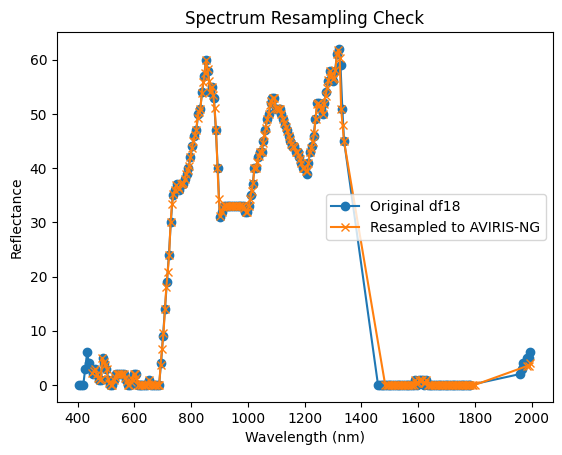

In [21]:
import matplotlib.pyplot as plt

idx = 3  # pick a sample
plt.plot(band_centers_18, reflectance_18[idx], label='Original df18', marker='o')
plt.plot(band_centers_ng, resampled_array[idx], label='Resampled to AVIRIS-NG', marker='x')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Spectrum Resampling Check")
plt.legend()
plt.show()


In [22]:
# Join based on indexes
df18resampled = pd.concat([df18_resampled_to_ng, gdf18[['geometry', 'class', 'group', 'change']]], axis=1)
# drop rows with na values in class column
df18resampled = df18resampled.dropna(subset=['class'])
df18resampled.head()

,452.32565,457.33566,462.34564,467.35565,472.35565,477.36566,482.37564,487.38565,492.39566,497.40564,...,1789.6356,1794.6456,1799.6556,1984.9757,1989.9856,1994.9956,geometry,class,group,change
0,86.879069,84.123137,81.090895,82.0,87.665519,90.940339,94.155108,99.0,99.723911,100.866075,...,806.0,806.0,806.0,112.450247,114.5,116.483814,POINT (19.01091 -33.9917),6.0,2.0,0.0
1,7.000000,5.561568,4.272685,7.0,9.428080,10.000000,10.000000,10.0,10.000000,11.154767,...,211.0,211.0,211.0,36.230127,35.0,34.008093,POINT (19.00879 -33.9911),6.0,2.0,0.0
2,75.362793,72.123137,69.545369,75.0,80.665519,85.492610,91.124087,95.0,95.723911,96.288692,...,641.0,641.0,641.0,84.950371,87.0,89.479768,POINT (19.00823 -33.99113),6.0,2.0,0.0
3,2.120931,2.479477,2.909105,2.0,1.190640,1.000000,1.124087,5.0,4.276089,3.711308,...,0.0,0.0,0.0,3.499625,3.5,3.995954,POINT (19.0014 -33.99701),6.0,1.0,0.0
4,15.120931,11.643660,8.090895,9.0,9.809360,9.611932,9.000000,9.0,9.000000,8.422616,...,1.0,1.0,1.0,5.409127,5.0,5.495954,POINT (19.00051 -33.99803),6.0,0.0,0.0


In [23]:
gdf23 = gpd.sjoin(df23filtered.drop(['class', 'group', 'change', 'index_right'], axis =1), gdf[['geometry', 'class', 'group', 'change', '2023_class']], how='left', predicate='intersects')

In [25]:
def l2_normalize_dataframe(df, wavelength_cols):
    # Compute L2 norm per row
    l2_norm = np.sqrt((df[wavelength_cols] ** 2).sum(axis=1))
    
    # Avoid division by zero
    l2_norm = l2_norm.replace(0, np.nan)
    
    # Normalize the wavelength columns
    df[wavelength_cols] = df[wavelength_cols].div(l2_norm, axis=0)
    
    return df

gdf23norm = l2_normalize_dataframe(gdf23, wavelength23_cols)
gdf23norm

gdf18norm = l2_normalize_dataframe(df18resampled, wavelength23_cols)
gdf18norm


,452.32565,457.33566,462.34564,467.35565,472.35565,477.36566,482.37564,487.38565,492.39566,497.40564,...,1789.6356,1794.6456,1799.6556,1984.9757,1989.9856,1994.9956,geometry,class,group,change
0,0.002654,0.002570,0.002478,0.002505,0.002678,0.002779,0.002877,0.003025,0.003047,0.003082,...,0.024626,0.024626,0.024626,0.003436,0.003498,0.003559,POINT (19.01091 -33.9917),6.0,2.0,0.0
1,0.000621,0.000494,0.000379,0.000621,0.000837,0.000888,0.000888,0.000888,0.000888,0.000990,...,0.018732,0.018732,0.018732,0.003216,0.003107,0.003019,POINT (19.00879 -33.9911),6.0,2.0,0.0
2,0.003802,0.003638,0.003508,0.003783,0.004069,0.004313,0.004597,0.004792,0.004829,0.004857,...,0.032336,0.032336,0.032336,0.004285,0.004389,0.004514,POINT (19.00823 -33.99113),6.0,2.0,0.0
3,0.004226,0.004940,0.005796,0.003985,0.002372,0.001992,0.002240,0.009962,0.008520,0.007394,...,0.000000,0.000000,0.000000,0.006973,0.006973,0.007961,POINT (19.0014 -33.99701),6.0,1.0,0.0
4,0.022799,0.017556,0.012199,0.013570,0.014790,0.014492,0.013570,0.013570,0.013570,0.012699,...,0.001508,0.001508,0.001508,0.008156,0.007539,0.008287,POINT (19.00051 -33.99803),6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,0.033065,0.031526,0.030065,0.030065,0.031363,0.031668,0.031681,0.032069,0.030909,0.030582,...,0.026056,0.026056,0.026056,0.005540,0.005211,0.005211,POINT (19.49842 -33.99394),7.0,2.0,0.0
1680,0.013186,0.013171,0.013154,0.013191,0.013555,0.013894,0.014310,0.014825,0.014854,0.014889,...,0.074981,0.074981,0.074981,0.049794,0.049660,0.049539,POINT (19.49755 -33.99539),7.0,2.0,0.0
1682,0.018935,0.019089,0.019171,0.019294,0.019920,0.020316,0.020733,0.021516,0.021687,0.021849,...,0.089633,0.089633,0.089633,0.068878,0.068740,0.068606,POINT (19.49639 -33.99409),7.0,2.0,0.0
1683,0.000242,0.000264,0.000264,0.000264,0.000620,0.000908,0.001264,0.002286,0.002604,0.002725,...,0.037188,0.037188,0.037188,0.012968,0.012572,0.012179,POINT (19.4938 -33.99384),3.0,2.0,0.0


## Modelling

In [25]:
# 1) train on 2018 (all), predict on 2018 (all)
# 2) train on 2023 (no change), predict on 2023 (no change)
# 3) train on 2018 (2018), predict on 2023 (no change)
# 4) train on 2018 (all) and 2023 (no change), predict on 2023 (no change)
# 5) train on 2018 (all) and 2023 (no change), predict on 2023 (change). Then train on all 2018 and 2023 and predict on 2023 (all)

# test effect of normalisation and different strategies
# Is it valuable to label change (to-class). does binary change suffice?


### Experiment 1: train on 2018 (all), predict on 2018 (all)

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df18resampled[wavelength23_cols], df18resampled['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [28]:
! uv pip install "tabpfn-extensions[all] @ git+https://github.com/PriorLabs/tabpfn-extensions.git" -U

Using Python 3.12.2 environment at /home/geethen/miniconda3/envs/ert
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD) 
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD)A
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD)A
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD)A
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD)A
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD)A
Updating https://github.com/PriorLabs/tabpfn-extensions.git (HEAD)A
 Updated https://github.com/PriorLabs/tabpfn-extensions.git (ec00294)
Resolved 69 packages in 1.59s                                        
Building tabpfn-extensions @ git+https://github.com/PriorLabs/tabpfn-extensions.git@
Building tabpfn-extensions @ git+https://github.com/PriorLabs/tabpfn-extensions.git@
Building tabpfn-extensions @ git+https://github.com/PriorLabs/tabpfn-extensions.git@
Building tabpfn-extensions @ git+https://github.com/PriorLab

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df18resampled[wavelength23_cols], df18resampled['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [33]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

100%|██████████| 16/16 [00:26<00:00,  1.65s/it]

Accuracy 0.8117647058823529


### Experiment 1.5: train on 2018 (no change), predict on 2018 (no change)

In [34]:
df18subset = df18resampled[df18resampled['change'] == 0].copy()

In [35]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df18subset[wavelength23_cols], df18subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df18subset[wavelength23_cols], df18subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [38]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.7852760736196319


### Experiment 1.6: train on 2023 (all), predict on 2023 (all)

In [40]:
# use 2018 class for 2023 whereever there is no change
gdf23.loc[gdf23['change'] == 0, '2023_class'] = gdf23['class']
gdf23.dropna(subset=['2023_class'], inplace=True)

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = gdf23[wavelength23_cols], gdf23['2023_class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.54


In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = gdf23[wavelength23_cols], gdf23['2023_class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [45]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

100%|██████████| 16/16 [00:33<00:00,  2.07s/it]

Accuracy 0.6903914590747331


### Experiment 2: train on 2023 (no change), predict on 2023 (no change)

In [63]:
df23subset = df23filtered[df23filtered['change'] == 0].copy()

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [67]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.7604017216642754


### Experiment 3: train on 2018 (2018), predict on 2023 (no change)

In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df18resampled[wavelength23_cols], df18resampled['class'].astype(int)

clf.fit(X, y)

RandomForestClassifier()

In [69]:
prediction_probabilities = clf.predict_proba(df23subset[wavelength23_cols])
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(df23subset[wavelength23_cols])
# Calculate accuracy
accuracy = accuracy_score(df23subset['class'], predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.05


In [70]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df18resampled[wavelength23_cols], df18resampled['class'].astype(int)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X, y)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [71]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(df23subset[wavelength23_cols])
print("Accuracy", accuracy_score(df23subset['class'], predictions))

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:49<00:00,  3.07s/it]

Accuracy 0.08464849354375897


### Experiment 4: train on 2018 (all) and 2023 (no change), predict on 2023 (no change)

In [72]:
df1823 = pd.concat([df18resampled[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols]], ignore_index=True)
df1823

n18 = len(df18resampled)
n23 = len(df23subset)


In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df1823.index, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
train_from_18 = (idx_train < n18).sum()
train_from_23 = (idx_train >= n18).sum()
test_from_18 = (idx_test < n18).sum()
test_from_23 = (idx_test >= n18).sum()

train_total = len(idx_train)
test_total = len(idx_test)

print("Train proportions:")
print(f"df18: {train_from_18 / train_total:.2f}, df23: {train_from_23 / train_total:.2f}")

print("Test proportions:")
print(f"df18: {test_from_18 / test_total:.2f}, df23: {test_from_23 / test_total:.2f}")


Train proportions:
df18: 0.46, df23: 0.54
Test proportions:
df18: 0.46, df23: 0.54


In [75]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


In [76]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [77]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

100%|██████████| 16/16 [00:51<00:00,  3.24s/it]

Accuracy 0.7670278637770898


### Experiment 5: train on 2018 (all) and 2023 (no change), predict on 2023 (change). Then train on all 2018 and 2023 and predict on 2023 (all)


In [78]:
df1823 = pd.concat([df18resampled[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols]], ignore_index=True)
df1823

n18 = len(df18resampled)
n23 = len(df23subset)


In [79]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df1823.index, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
train_from_18 = (idx_train < n18).sum()
train_from_23 = (idx_train >= n18).sum()
test_from_18 = (idx_test < n18).sum()
test_from_23 = (idx_test >= n18).sum()

train_total = len(idx_train)
test_total = len(idx_test)

print("Train proportions:")
print(f"df18: {train_from_18 / train_total:.2f}, df23: {train_from_23 / train_total:.2f}")

print("Test proportions:")
print(f"df18: {test_from_18 / test_total:.2f}, df23: {test_from_23 / test_total:.2f}")


Train proportions:
df18: 0.46, df23: 0.54
Test proportions:
df18: 0.46, df23: 0.54


In [81]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


In [82]:
# get pseudo-labels for 2023 change class

df23changesubset = df23filtered[df23filtered['change'] == 1].copy()
X = df23changesubset[wavelength23_cols]
predicted_labels = clf.predict(X)
df23changesubset['predicted_class'] = predicted_labels

# Ensure the 'class' column is of compatible type (e.g., int)
df23changesubset['class'] = df23changesubset['class'].astype(int)

# Compare predicted and true labels
matches = df23changesubset['predicted_class'] == df23changesubset['class']

# Compute proportion (i.e., accuracy)
proportion = matches.mean()

print(f"Proportion of matches: {proportion:.2f}")


Proportion of matches: 0.20


In [83]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df23changesubset['class'], df23changesubset['predicted_class']))
print(classification_report(df23changesubset['class'], df23changesubset['predicted_class']))


[[ 4  0  0  0  0  0  0  0  0  0 10]
 [ 0  1  0  1  0  0  1  0  0  0  0]
 [ 5  0 20 14 25  7  1  4  7  0  0]
 [ 1  0  8 12  7  1  1  0  3  0  0]
 [ 6  0  1  5 18  0  0  4  0  0  0]
 [ 1  0  0  0  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  1  0  0  0]
 [ 1  0 10 21 56  0  1 17  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.22      0.29      0.25        14
           1       1.00      0.33      0.50         3
           2       0.51      0.24      0.33        83
           3       0.22      0.36      0.28        33
           4       0.17      0.53      0.25        34
           5       0.11      0.20      0.14         5
           6       0.17      1.00      0.29         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       115
        

In [84]:
df23changesubset['class'] = df23changesubset['predicted_class'].astype(int)
dfallsemisuperivised = pd.concat([df18resampled[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols], df23changesubset[['class']+wavelength23_cols]], ignore_index=True)

In [85]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = dfallsemisuperivised[wavelength23_cols], dfallsemisuperivised['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [88]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

100%|██████████| 16/16 [00:51<00:00,  3.22s/it]

Accuracy 0.7647058823529411


In [89]:
# get pseudo-labels for 2023 change class

df23changesubset = df23filtered[df23filtered['change'] == 1].copy()
X = df23changesubset[wavelength23_cols]
predicted_labels = clf.predict(X)
df23changesubset['predicted_class'] = predicted_labels

# Ensure the 'class' column is of compatible type (e.g., int)
df23changesubset['class'] = df23changesubset['class'].astype(int)

# Compare predicted and true labels
matches = df23changesubset['predicted_class'] == df23changesubset['class']

# Compute proportion (i.e., accuracy)
proportion = matches.mean()

print(f"Proportion of matches: {proportion:.2f}")


100%|██████████| 16/16 [00:35<00:00,  2.24s/it]

Proportion of matches: 0.31


In [90]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df23changesubset['class'], df23changesubset['predicted_class']))
print(classification_report(df23changesubset['class'], df23changesubset['predicted_class']))


[[ 4  0  0  0  0  0  0  0  0  0 10]
 [ 0  3  0  0  0  0  0  0  0  0  0]
 [ 5  0 44 10 16  1  5  2  0  0  0]
 [ 1  0  4 13  8  0  0  1  6  0  0]
 [ 5  0  1  3 23  0  0  2  0  0  0]
 [ 1  0  1  0  0  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  1  0  0]
 [ 0  0  5 18 49  0  1 31 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.25      0.29      0.27        14
           1       1.00      1.00      1.00         3
           2       0.80      0.53      0.64        83
           3       0.30      0.39      0.34        33
           4       0.23      0.68      0.35        34
           5       0.50      0.20      0.29         5
           6       0.11      1.00      0.20         1
           7       0.00      0.00      0.00         0
           8       0.06      0.25      0.09         4
           9       0.00      0.00      0.00       115
        

In [91]:
df23changesubset['class'] = df23changesubset['predicted_class'].astype(int)
dfallsemisuperivised = pd.concat([df18resampled[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols], df23changesubset[['class']+wavelength23_cols]], ignore_index=True)

In [92]:
# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = dfallsemisuperivised[wavelength23_cols], dfallsemisuperivised['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)


ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [93]:
# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

100%|██████████| 16/16 [00:57<00:00,  3.59s/it]

Accuracy 0.7859624739402363


### Experiment 6: train on 2023 (stable), predict on 2018 (all labelled)

In [94]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)

clf.fit(X, y)

RandomForestClassifier()

In [95]:
prediction_probabilities = clf.predict_proba(df18resampled[wavelength23_cols])
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(df18resampled[wavelength23_cols])
# Calculate accuracy
accuracy = accuracy_score(df18resampled['class'], predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.04


In [96]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X, y)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [97]:
# Get the predicted class labels
predicted_labels = clf.predict(df18resampled[wavelength23_cols])
# Calculate accuracy
accuracy = accuracy_score(df18resampled['class'], predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.05


### Experiment 7: train on 2018 (all) and 2023 (all), predict on 2023 (no change)

In [24]:
# use 2018 class for 2023 whereever there is no change
gdf23.loc[gdf23['change'] == 0, '2023_class'] = gdf23['class']
gdf23.dropna(subset=['2023_class'], inplace=True)

In [25]:
df1823 = pd.concat([df18resampled[['class']+wavelength23_cols],
                    gdf23[['2023_class']+wavelength23_cols].rename(columns={'2023_class': 'class'})]
, ignore_index=True)
df1823

n18 = len(df18resampled)
n23 = len(gdf23)


In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df1823.index, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
train_from_18 = (idx_train < n18).sum()
train_from_23 = (idx_train >= n18).sum()
test_from_18 = (idx_test < n18).sum()
test_from_23 = (idx_test >= n18).sum()

train_total = len(idx_train)
test_total = len(idx_test)

print("Train proportions:")
print(f"df18: {train_from_18 / train_total:.2f}, df23: {train_from_23 / train_total:.2f}")

print("Test proportions:")
print(f"df18: {test_from_18 / test_total:.2f}, df23: {test_from_23 / test_total:.2f}")


Train proportions:
df18: 0.42, df23: 0.58
Test proportions:
df18: 0.41, df23: 0.59


In [53]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.59


In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [44]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

100%|██████████| 16/16 [00:57<00:00,  3.56s/it]

Accuracy 0.7482614742698191


### With normalised data

In [ ]:
def l2_normalize_dataframe(df, wavelength_cols):
    # Compute L2 norm per row
    l2_norm = np.sqrt((df[wavelength_cols] ** 2).sum(axis=1))
    
    # Avoid division by zero
    l2_norm = l2_norm.replace(0, np.nan)
    
    # Normalize the wavelength columns
    df[wavelength_cols] = df[wavelength_cols].div(l2_norm, axis=0)
    
    return df

gdf23norm = l2_normalize_dataframe(gdf23, wavelength23_cols)
gdf23norm

gdf18norm = l2_normalize_dataframe(df18resampled, wavelength23_cols)
gdf18norm


,452.32565,457.33566,462.34564,467.35565,472.35565,477.36566,482.37564,487.38565,492.39566,497.40564,...,1789.6356,1794.6456,1799.6556,1984.9757,1989.9856,1994.9956,geometry,class,group,change
0,0.002654,0.002570,0.002478,0.002505,0.002678,0.002779,0.002877,0.003025,0.003047,0.003082,...,0.024626,0.024626,0.024626,0.003436,0.003498,0.003559,POINT (19.01091 -33.9917),6.0,2.0,0.0
1,0.000621,0.000494,0.000379,0.000621,0.000837,0.000888,0.000888,0.000888,0.000888,0.000990,...,0.018732,0.018732,0.018732,0.003216,0.003107,0.003019,POINT (19.00879 -33.9911),6.0,2.0,0.0
2,0.003802,0.003638,0.003508,0.003783,0.004069,0.004313,0.004597,0.004792,0.004829,0.004857,...,0.032336,0.032336,0.032336,0.004285,0.004389,0.004514,POINT (19.00823 -33.99113),6.0,2.0,0.0
3,0.004226,0.004940,0.005796,0.003985,0.002372,0.001992,0.002240,0.009962,0.008520,0.007394,...,0.000000,0.000000,0.000000,0.006973,0.006973,0.007961,POINT (19.0014 -33.99701),6.0,1.0,0.0
4,0.022799,0.017556,0.012199,0.013570,0.014790,0.014492,0.013570,0.013570,0.013570,0.012699,...,0.001508,0.001508,0.001508,0.008156,0.007539,0.008287,POINT (19.00051 -33.99803),6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,0.033065,0.031526,0.030065,0.030065,0.031363,0.031668,0.031681,0.032069,0.030909,0.030582,...,0.026056,0.026056,0.026056,0.005540,0.005211,0.005211,POINT (19.49842 -33.99394),7.0,2.0,0.0
1680,0.013186,0.013171,0.013154,0.013191,0.013555,0.013894,0.014310,0.014825,0.014854,0.014889,...,0.074981,0.074981,0.074981,0.049794,0.049660,0.049539,POINT (19.49755 -33.99539),7.0,2.0,0.0
1682,0.018935,0.019089,0.019171,0.019294,0.019920,0.020316,0.020733,0.021516,0.021687,0.021849,...,0.089633,0.089633,0.089633,0.068878,0.068740,0.068606,POINT (19.49639 -33.99409),7.0,2.0,0.0
1683,0.000242,0.000264,0.000264,0.000264,0.000620,0.000908,0.001264,0.002286,0.002604,0.002725,...,0.037188,0.037188,0.037188,0.012968,0.012572,0.012179,POINT (19.4938 -33.99384),3.0,2.0,0.0


## Modelling

In [ ]:
# 1) train on 2018 (all), predict on 2018 (all)
# 2) train on 2023 (no change), predict on 2023 (no change)
# 3) train on 2018 (2018), predict on 2023 (no change)
# 4) train on 2018 (all) and 2023 (no change), predict on 2023 (no change)
# 5) train on 2018 (all) and 2023 (no change), predict on 2023 (change). Then train on all 2018 and 2023 and predict on 2023 (all)

# test effect of normalisation and different strategies
# Is it valuable to label change (to-class). does binary change suffice?


### Experiment 1: train on 2018 (all), predict on 2018 (all)

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = gdf18norm[wavelength23_cols], gdf18norm['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .65

Accuracy: 0.66


In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = gdf18norm[wavelength23_cols], gdf18norm['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [ ]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from 0.811 

100%|██████████| 16/16 [00:27<00:00,  1.72s/it]

Accuracy 0.8050420168067227


### Experiment 1.5: train on 2018 (no change), predict on 2018 (no change)

In [30]:
df18subset = gdf18norm[gdf18norm['change'] == 0].copy()

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df18subset[wavelength23_cols], df18subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df18subset[wavelength23_cols], df18subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [ ]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from 0.785

Accuracy 0.7995910020449898


### Experiment 1.6: train on 2023 (all), predict on 2023 (all)

In [35]:
# use 2018 class for 2023 whereever there is no change
gdf23norm.loc[gdf23norm['change'] == 0, '2023_class'] = gdf23norm['class']
gdf23norm.dropna(subset=['2023_class'], inplace=True)

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = gdf23norm[wavelength23_cols], gdf23norm['2023_class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from 0.54

Accuracy: 0.55


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = gdf23norm[wavelength23_cols], gdf23norm['2023_class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [ ]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from .690

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:33<00:00,  2.11s/it]

Accuracy 0.6892052194543298


### Experiment 2: train on 2023 (no change), predict on 2023 (no change)

In [40]:
df23subset = gdf23norm[gdf23norm['change'] == 0].copy()

In [41]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .60

Accuracy: 0.61


In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [44]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from .760

Accuracy 0.7704447632711621


### Experiment 3: train on 2018 (2018), predict on 2023 (no change)

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = gdf18norm[wavelength23_cols], gdf18norm['class'].astype(int)

clf.fit(X, y)

RandomForestClassifier()

In [46]:
prediction_probabilities = clf.predict_proba(df23subset[wavelength23_cols])
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(df23subset[wavelength23_cols])
# Calculate accuracy
accuracy = accuracy_score(df23subset['class'], predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .05

Accuracy: 0.45


In [47]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = gdf18norm[wavelength23_cols], gdf18norm['class'].astype(int)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X, y)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [ ]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(df23subset[wavelength23_cols])
print("Accuracy", accuracy_score(df23subset['class'], predictions))

# from .085

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:49<00:00,  3.10s/it]

Accuracy 0.4253945480631277


### Experiment 4: train on 2018 (all) and 2023 (no change), predict on 2023 (no change)

In [49]:
df1823 = pd.concat([gdf18norm[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols]], ignore_index=True)
df1823

n18 = len(gdf18norm)
n23 = len(df23subset)


In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df1823.index, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
train_from_18 = (idx_train < n18).sum()
train_from_23 = (idx_train >= n18).sum()
test_from_18 = (idx_test < n18).sum()
test_from_23 = (idx_test >= n18).sum()

train_total = len(idx_train)
test_total = len(idx_test)

print("Train proportions:")
print(f"df18: {train_from_18 / train_total:.2f}, df23: {train_from_23 / train_total:.2f}")

print("Test proportions:")
print(f"df18: {test_from_18 / test_total:.2f}, df23: {test_from_23 / test_total:.2f}")


Train proportions:
df18: 0.46, df23: 0.54
Test proportions:
df18: 0.46, df23: 0.54


In [53]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .62

Accuracy: 0.65


In [54]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [55]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from .767

100%|██████████| 16/16 [00:52<00:00,  3.26s/it]

Accuracy 0.7778637770897833


### Experiment 5: train on 2018 (all) and 2023 (no change), predict on 2023 (change). Then train on all 2018 and 2023 and predict on 2023 (all)


In [56]:
df1823 = pd.concat([gdf18norm[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols]], ignore_index=True)
df1823

n18 = len(gdf18norm)
n23 = len(df23subset)


In [ ]:
# Random forest for pseudo labels
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df1823.index, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
train_from_18 = (idx_train < n18).sum()
train_from_23 = (idx_train >= n18).sum()
test_from_18 = (idx_test < n18).sum()
test_from_23 = (idx_test >= n18).sum()

train_total = len(idx_train)
test_total = len(idx_test)

print("Train proportions:")
print(f"df18: {train_from_18 / train_total:.2f}, df23: {train_from_23 / train_total:.2f}")

print("Test proportions:")
print(f"df18: {test_from_18 / test_total:.2f}, df23: {test_from_23 / test_total:.2f}")


Train proportions:
df18: 0.46, df23: 0.54
Test proportions:
df18: 0.46, df23: 0.54


In [59]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .63

Accuracy: 0.64


In [ ]:
# get random forest based pseudo-labels for 2023 change class

df23changesubset = gdf23norm[gdf23norm['change'] == 1].copy()
X = df23changesubset[wavelength23_cols]
predicted_labels = clf.predict(X)
df23changesubset['predicted_class'] = predicted_labels

# Ensure the 'class' column is of compatible type (e.g., int)
df23changesubset['class'] = df23changesubset['class'].astype(int)

# Compare predicted and true labels
matches = df23changesubset['predicted_class'] == df23changesubset['class']

# Compute proportion (i.e., accuracy)
proportion = matches.mean()

print(f"Proportion of matches: {proportion:.2f}") # lower is better. disagreement with old labels


Proportion of matches: 0.23


In [61]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df23changesubset['class'], df23changesubset['predicted_class']))
print(classification_report(df23changesubset['class'], df23changesubset['predicted_class']))


[[ 0  0  0  1  3  0  0  0  0  0 10]
 [ 0  2  0  0  0  0  0  0  1  0  0]
 [ 4  0 24 20 27  2  0  6  0  0  0]
 [ 0  0  6 14  8  2  1  1  1  0  0]
 [ 2  0  0  5 24  0  0  2  1  0  0]
 [ 0  0  1  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  2  7 60  0  0 33 12  0  1]
 [ 0  0  0  0  0  0  0  0  0  1  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      0.67      0.80         3
           2       0.73      0.29      0.41        83
           3       0.30      0.42      0.35        33
           4       0.19      0.71      0.30        34
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       115
        

In [62]:
df23changesubset['class'] = df23changesubset['predicted_class'].astype(int)
dfallsemisuperivised = pd.concat([gdf18norm[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols], df23changesubset[['class']+wavelength23_cols]], ignore_index=True)

In [63]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = dfallsemisuperivised[wavelength23_cols], dfallsemisuperivised['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# random forest semi-supervised results
# 
# # Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .65

Accuracy: 0.68


In [67]:
# repeat with TabPFN
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [68]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from .765

100%|██████████| 16/16 [00:53<00:00,  3.36s/it]

Accuracy 0.7778637770897833


In [69]:
# get pseudo-labels for 2023 change class

df23changesubset = gdf23norm[gdf23norm['change'] == 1].copy()
X = df23changesubset[wavelength23_cols]
predicted_labels = clf.predict(X)
df23changesubset['predicted_class'] = predicted_labels

# Ensure the 'class' column is of compatible type (e.g., int)
df23changesubset['class'] = df23changesubset['class'].astype(int)

# Compare predicted and true labels
matches = df23changesubset['predicted_class'] == df23changesubset['class']

# Compute proportion (i.e., accuracy)
proportion = matches.mean()

print(f"Proportion of matches: {proportion:.2f}")


  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:36<00:00,  2.31s/it]

Proportion of matches: 0.26


In [70]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df23changesubset['class'], df23changesubset['predicted_class']))
print(classification_report(df23changesubset['class'], df23changesubset['predicted_class']))


[[ 0  0  0  0  3  0  1  0  0  0 10]
 [ 0  2  0  0  0  0  1  0  0  0  0]
 [ 5  0 33  5 33  1  1  5  0  0  0]
 [ 0  0  3 12 11  0  0  1  6  0  0]
 [ 1  0  1  4 26  0  0  2  0  0  0]
 [ 0  0  1  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  5  4 58  0  0 29 18  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      0.67      0.80         3
           2       0.77      0.40      0.52        83
           3       0.48      0.36      0.41        33
           4       0.19      0.76      0.31        34
           5       0.50      0.33      0.40         3
           6       0.25      1.00      0.40         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00       115
        

In [71]:
df23changesubset['class'] = df23changesubset['predicted_class'].astype(int)
dfallsemisuperivised = pd.concat([gdf18norm[['class']+wavelength23_cols], df23subset[['class']+wavelength23_cols], df23changesubset[['class']+wavelength23_cols]], ignore_index=True)

In [72]:
# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = dfallsemisuperivised[wavelength23_cols], dfallsemisuperivised['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)


ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [73]:
# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from .786

100%|██████████| 16/16 [00:58<00:00,  3.66s/it]

Accuracy 0.7976356050069541


### Experiment 6: train on 2023 (stable), predict on 2018 (all labelled)

In [74]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)

clf.fit(X, y)

RandomForestClassifier()

In [ ]:
prediction_probabilities = clf.predict_proba(gdf18norm[wavelength23_cols])
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(gdf18norm[wavelength23_cols])
# Calculate accuracy
accuracy = accuracy_score(gdf18norm['class'], predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .04

Accuracy: 0.45


In [76]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df23subset[wavelength23_cols], df23subset['class'].astype(int)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X, y)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [78]:
# Get the predicted class labels
predicted_labels = clf.predict(gdf18norm[wavelength23_cols])
# Calculate accuracy
accuracy = accuracy_score(gdf18norm['class'], predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .05

Accuracy: 0.52


### Experiment 7: train on 2018 (all) and 2023 (all), predict on 2023 (no change)

In [79]:
# use 2018 class for 2023 whereever there is no change
gdf23norm.loc[gdf23norm['change'] == 0, '2023_class'] = gdf23norm['class']
gdf23norm.dropna(subset=['2023_class'], inplace=True)

In [80]:
df1823 = pd.concat([gdf18norm[['class']+wavelength23_cols],
                    gdf23norm[['2023_class']+wavelength23_cols].rename(columns={'2023_class': 'class'})]
, ignore_index=True)
df1823

n18 = len(gdf18norm)
n23 = len(gdf23norm)


In [81]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df1823.index, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
train_from_18 = (idx_train < n18).sum()
train_from_23 = (idx_train >= n18).sum()
test_from_18 = (idx_test < n18).sum()
test_from_23 = (idx_test >= n18).sum()

train_total = len(idx_train)
test_total = len(idx_test)

print("Train proportions:")
print(f"df18: {train_from_18 / train_total:.2f}, df23: {train_from_23 / train_total:.2f}")

print("Test proportions:")
print(f"df18: {test_from_18 / test_total:.2f}, df23: {test_from_23 / test_total:.2f}")


Train proportions:
df18: 0.42, df23: 0.58
Test proportions:
df18: 0.41, df23: 0.59


In [83]:
prediction_probabilities = clf.predict_proba(X_test)
prediction_probabilities.shape

# Get the predicted class labels
predicted_labels = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# from .59

Accuracy: 0.64


In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Load data
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)
clf.fit(X_train, y_train)

ManyClassClassifier(alphabet_size=10, estimator=TabPFNClassifier())

In [85]:
# Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, predictions))

# from .748

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:55<00:00,  3.49s/it]

Accuracy 0.7538247566063978


# TabPFN outlier detection

In [28]:
from tabpfn import TabPFNClassifier, TabPFNRegressor
from tabpfn_extensions.unsupervised import TabPFNUnsupervisedModel

# Create TabPFN models for classification and regression
clf = TabPFNClassifier()
reg = TabPFNRegressor()

# Create the unsupervised model
model = TabPFNUnsupervisedModel(tabpfn_clf=clf, tabpfn_reg=reg)

X, y = df1823[wavelength23_cols], df1823['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

import torch
# Fit the model on data without labels
model.fit(torch.Tensor(X_train.values))

TabPFNUnsupervisedModel(tabpfn_clf=TabPFNClassifier(),
                        tabpfn_reg=TabPFNRegressor())

In [29]:
outlier_scores = model.outliers(torch.Tensor(X_test.values))          # Detect outliers

: 

In [78]:
# Different unsupervised tasks
X_synthetic = model.generate_synthetic_data(100)  # Generate new samples

  0%|          | 0/245 [00:00<?, ?it/s]

tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

 20%|██        | 50/245 [02:02<07:56,  2.45s/it]


KeyboardInterrupt: 

# Apply clean labs

In [47]:
!uv pip install matplotlib
!uv pip install cleanlab[datalab]

Using Python 3.12.2 environment at /home/geethen/miniconda3/envs/ert
Audited 1 package in 7ms
Using Python 3.12.2 environment at /home/geethen/miniconda3/envs/ert
Resolved 38 packages in 588ms                                        
⠙ Preparing packages... (0/6)                                                   
⠙ Preparing packages... (0/6)----     0 B/189.08 KiB                    
⠙ Preparing packages... (0/6)---- 14.88 KiB/189.08 KiB                  
multiprocess ------------------------------     0 B/143.30 KiB
⠙ Preparing packages... (0/6)---- 14.88 KiB/189.08 KiB                  
multiprocess ------------------------------     0 B/143.30 KiB
⠙ Preparing packages... (0/6)---- 30.88 KiB/189.08 KiB                  
multiprocess ------------------------------     0 B/143.30 KiB
⠙ Preparing packages... (0/6)---- 46.88 KiB/189.08 KiB                  
dill       ------------------------------     0 B/113.53 KiB
multiprocess ------------------------------     0 B/143.30 KiB
⠙ Prepar

In [48]:
import numpy as np
import cleanlab
from cleanlab import Datalab
from cleanlab.classification import CleanLearning
from cleanlab.benchmarking import noise_generation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from numpy.random import multivariate_normal
from matplotlib import pyplot as plt

In [63]:
df1823 = pd.concat([df18resampled[['class']+wavelength23_cols],
                    gdf23[['2023_class']+wavelength23_cols].rename(columns={'2023_class': 'class'})]
, ignore_index=True)
df1823
X, y = df1823[wavelength23_cols], df1823['class'].astype(int)

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from tabpfn import TabPFNClassifier
from tabpfn_extensions.many_class import ManyClassClassifier

# Create a base TabPFN classifier
base_clf = TabPFNClassifier()

# Initialize a classifier
clf = ManyClassClassifier(
    estimator=base_clf,
    alphabet_size=10  # Use TabPFN's maximum class limit
)

In [65]:
# Datalab offers several ways of loading the data
# we’ll simply wrap the training features and noisy labels in a dictionary.
data_dict = {"X": X, "y": y}

# get out of sample predicted probabilities via cross-validation.
pred_probs = cross_val_predict(
    estimator=clf, X=X, y=y, cv=3, method="predict_proba"
)

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [61]:
pred_probs.shape

(2876, 12)

In [62]:
lab = Datalab(data_dict, label_name="y")
lab.find_issues(pred_probs=pred_probs, features=X)

DatasetLoadError: Failed to load dataset from <class 'dict'>.
